In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import scipy
from skimage import color, filters, exposure, measure, morphology, util
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

In [6]:
ui = {
    'in_dir_path'       : 'C:/Users/cgusb/Research/mhe-analysis/data/jaysSettledGrains/output_01',
    'file_suffix'       : '.tiff',
    'slice_crop'        : None,
    'row_crop'          : None,
    'col_crop'          : None,
    'spatial_res'       : 1,
    'rm_min_size'       : 500,
    'out_dir_path'      : 'C:/Users/cgusb/Research/mhe-analysis/results/jaysSettledGrains/segmentflow_01',
    'out_prefix'        : '',
    'min_peak_distance' : 30,
    'overwrite'         : True,
    'save_checkpoints'  : 'show',
    'nslices'           : 5,
    'save_stl'          : True,
    'save_voxels'       : True,
}

## Load images


C:\Users\cgusb\Research\mhe-analysis\data\jaysSettledGrains\output_01
Loading images...
--> Images loaded as 3D array:  (49, 83, 71)
--> Plotting images: [ 0 12 24 36 48]


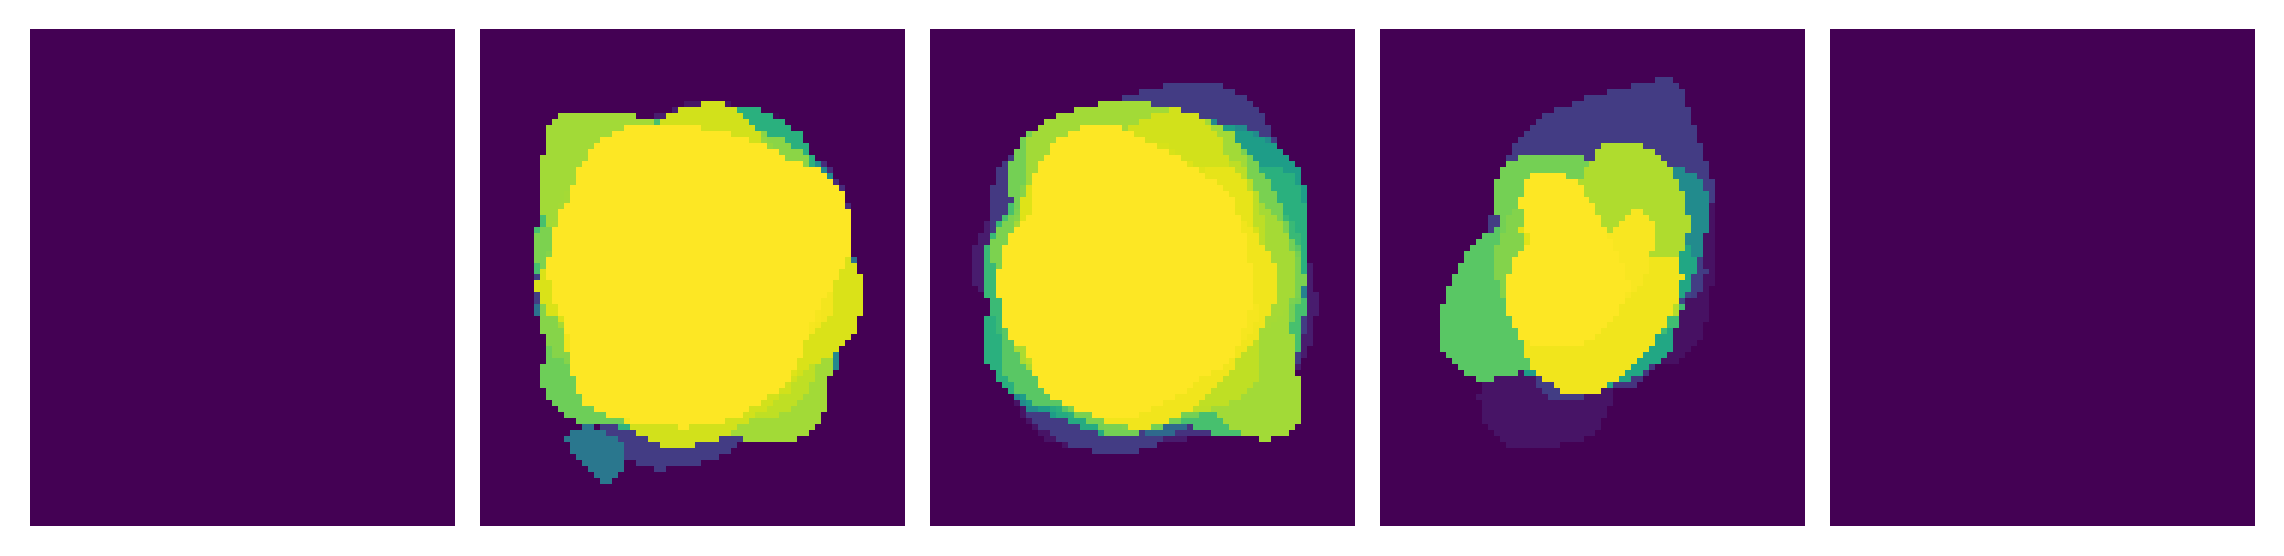

In [7]:
n_fig_digits = 2
fig_n = 0
if not Path(ui['out_dir_path']).exists():
    Path(ui['out_dir_path']).mkdir(parents=True)
#-------------#
# Load images #
#-------------#
print()
print(Path(ui['in_dir_path']).resolve())
imgs_semantic = segment.load_images(
    ui['in_dir_path'],
    slice_crop=ui['slice_crop'],
    row_crop=ui['row_crop'],
    col_crop=ui['col_crop'],
    convert_to_float=True,
    file_suffix=ui['file_suffix']
)
fig, axes = view.plot_slices(
    imgs_semantic,
    nslices=ui['nslices'],
    fig_w=7.5,
    dpi=300
)
if ui['save_checkpoints'] == 'show':
    plt.show()
elif ui['save_checkpoints'] == True:
    plt.savefig(
        Path(ui['out_dir_path'])
        / f'{str(fig_n).zfill(n_fig_digits)}-semantic-seg-imgs.png')

Segmenting images...
--> Number of particle(s) before border exclusion:  16526
--> Excluding border particles...
--> Segmentation complete. 15662 particle(s) segmented.


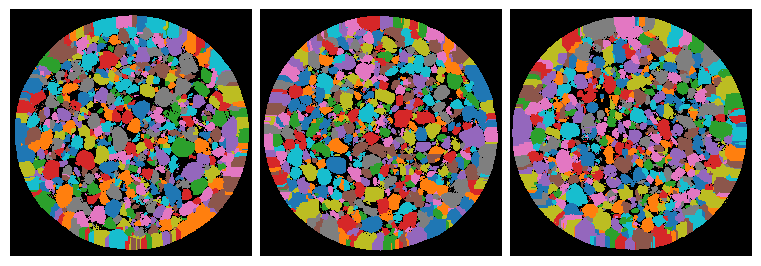

In [9]:
imgs_labeled = segment.watershed_segment(
    imgs_semantic==2,
    min_peak_distance=ui['min_peak_distance'],
    exclude_borders=False,
    return_dict=False
)
fig, axes = view.plot_color_labels(
    imgs_labeled,
    nslices=ui['nslices'],
    fig_w=7.5,
    dpi=300
)
fig_n += 1
if ui['save_checkpoints'] == 'show':
    plt.show()
elif ui['save_checkpoints'] == True:
    plt.savefig(
        Path(ui['out_dir_path'])
        / f'{str(fig_n).zfill(n_fig_digits)}-instance-seg-imgs.png')

In [ ]:
#--------------#
# Save outputs #
#--------------#
if ui['save_stl']:
    segment.save_as_stl_files(
        imgs_labeled,
        ui['out_dir_path'],
        ui['out_prefix'],
        make_new_save_dir=True,
        spatial_res=ui['spatial_res'],
        stl_overwrite=ui['overwrite']
    )
# save images
if ui['save_voxels']:
    segment.save_images(
        imgs_labeled,
        Path(ui['out_dir_path']) / f"{ui['out_prefix']}_labeled_voxels"
    )
